In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")

%matplotlib inline

In [3]:
df = pd.read_csv('GOOG.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-20,55.999500,56.170502,55.264000,55.689999,55.689999,21756000
1,2019-02-21,55.542000,55.597000,54.625999,54.848499,54.848499,28302000
2,2019-02-22,55.044998,55.562000,54.779999,55.518501,55.518501,20990000
3,2019-02-25,55.799999,55.926998,55.363499,55.470001,55.470001,28262000
4,2019-02-26,55.287498,55.975498,54.995998,55.756500,55.756500,29426000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.index = pd.to_datetime(df.Date)

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-02-20,2019-02-20,55.999500,56.170502,55.264000,55.689999,55.689999,21756000
2019-02-21,2019-02-21,55.542000,55.597000,54.625999,54.848499,54.848499,28302000
2019-02-22,2019-02-22,55.044998,55.562000,54.779999,55.518501,55.518501,20990000
2019-02-25,2019-02-25,55.799999,55.926998,55.363499,55.470001,55.470001,28262000
2019-02-26,2019-02-26,55.287498,55.975498,54.995998,55.756500,55.756500,29426000


In [15]:
goog = df["Close"]['2019-02-20':'2024-02-15']
goog.head()

Date
2019-02-20    55.689999
2019-02-21    54.848499
2019-02-22    55.518501
2019-02-25    55.470001
2019-02-26    55.756500
Name: Close, dtype: float64

In [16]:
goog.describe()

count    1257.000000
mean      101.057547
std        30.126245
min        51.811501
25%        71.959999
50%       102.751503
75%       129.574493
max       154.839996
Name: Close, dtype: float64

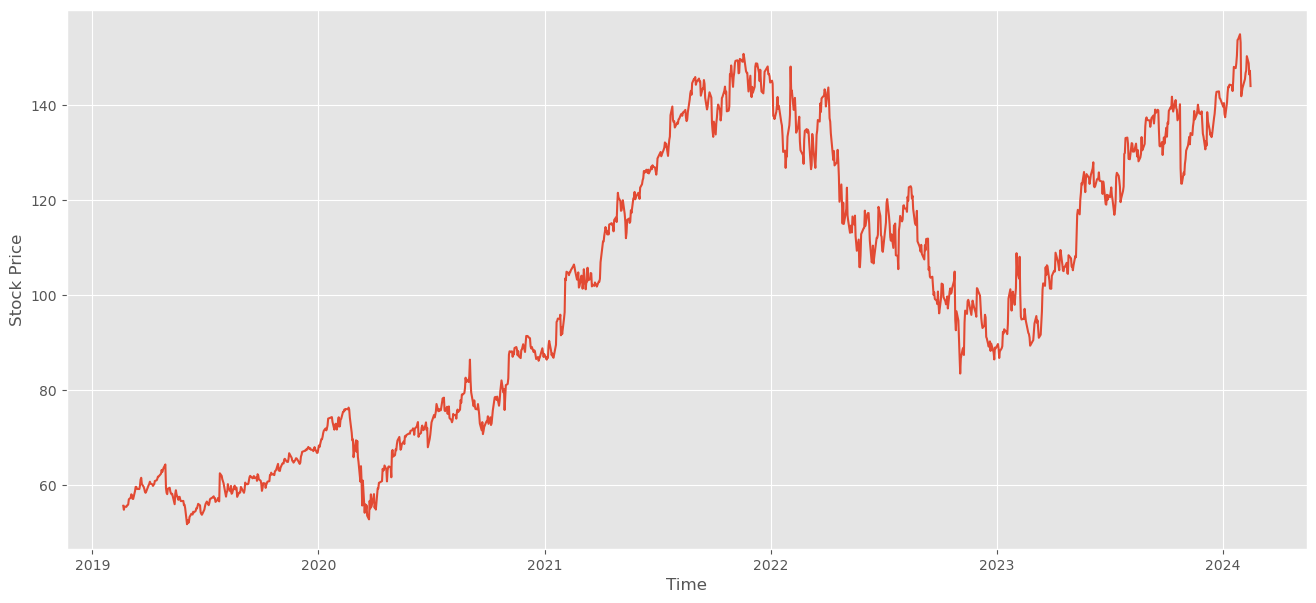

In [14]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time")
ax1.set_ylabel("Stock Price in USD")
ax1.plot(goog)

In [17]:
rollingmean = goog.rolling(12).mean()
rollstd = goog.rolling(12).std()


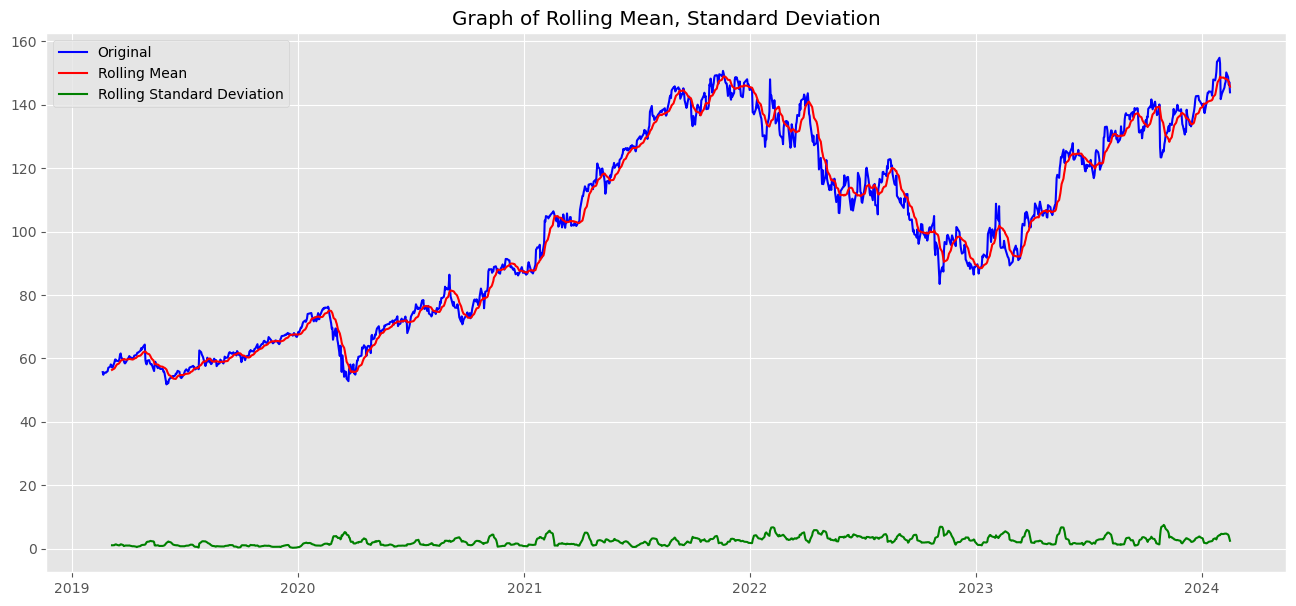

In [20]:
plt.figure(figsize=(16,7))
fig  = plt.figure(1)

original = plt.plot(goog, color = "blue", label = 'Original')
rollmean = plt.plot(rollingmean, color = "red", label = 'Rolling Mean')
std = plt.plot(rollstd, color = "green", label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')
plt.title("Graph of Rolling Mean, Standard Deviation")
plt.show()





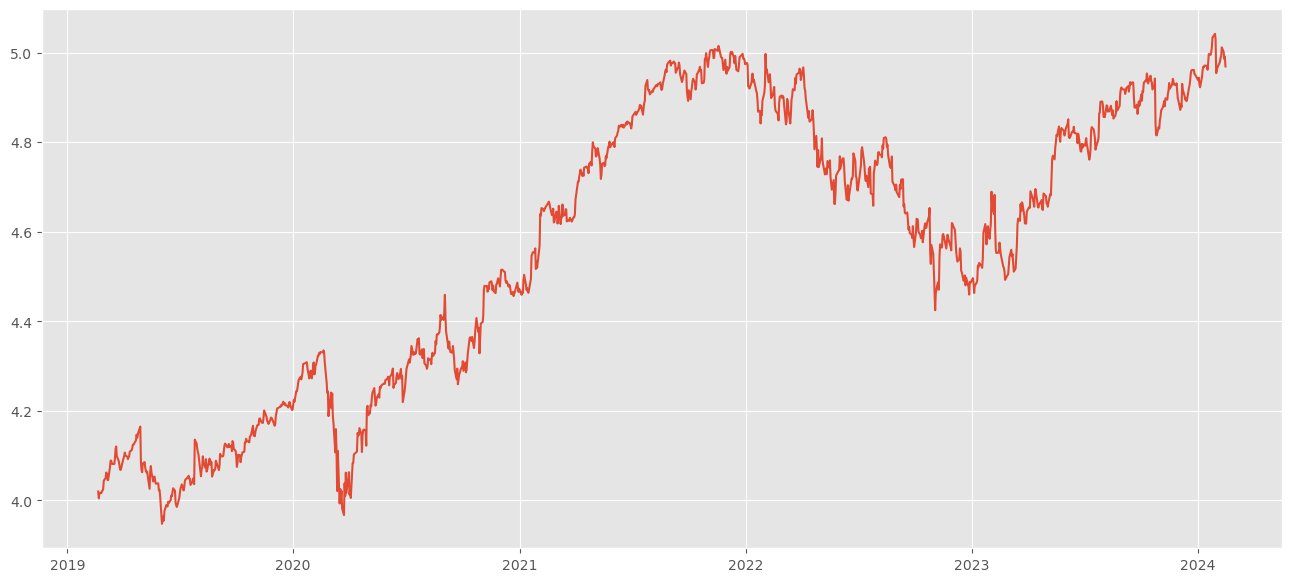

In [21]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(goog)
plt.plot(ts_log)

In [22]:
!pip install statsmodels

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_log, period=1, model='multiplicative')

In [25]:
trend = decomp.trend
seasonal = decomp.seasonal
residue = decomp.resid


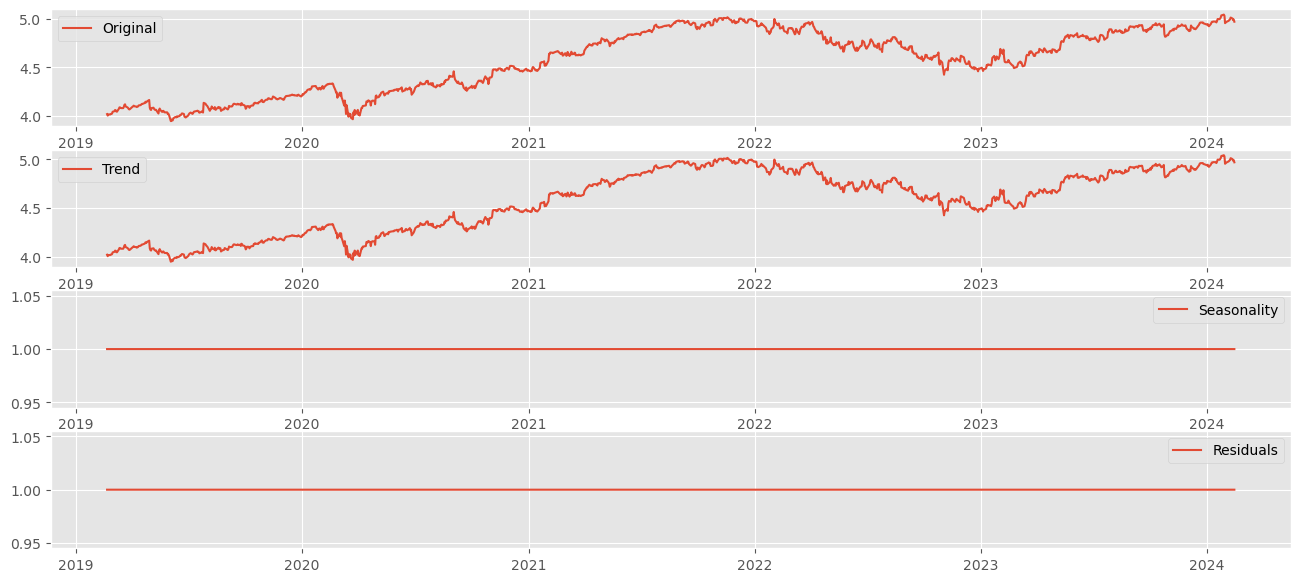

In [27]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residue, label='Residuals')
plt.legend(loc='best')

In [28]:
goog.sort_index(inplace=True)

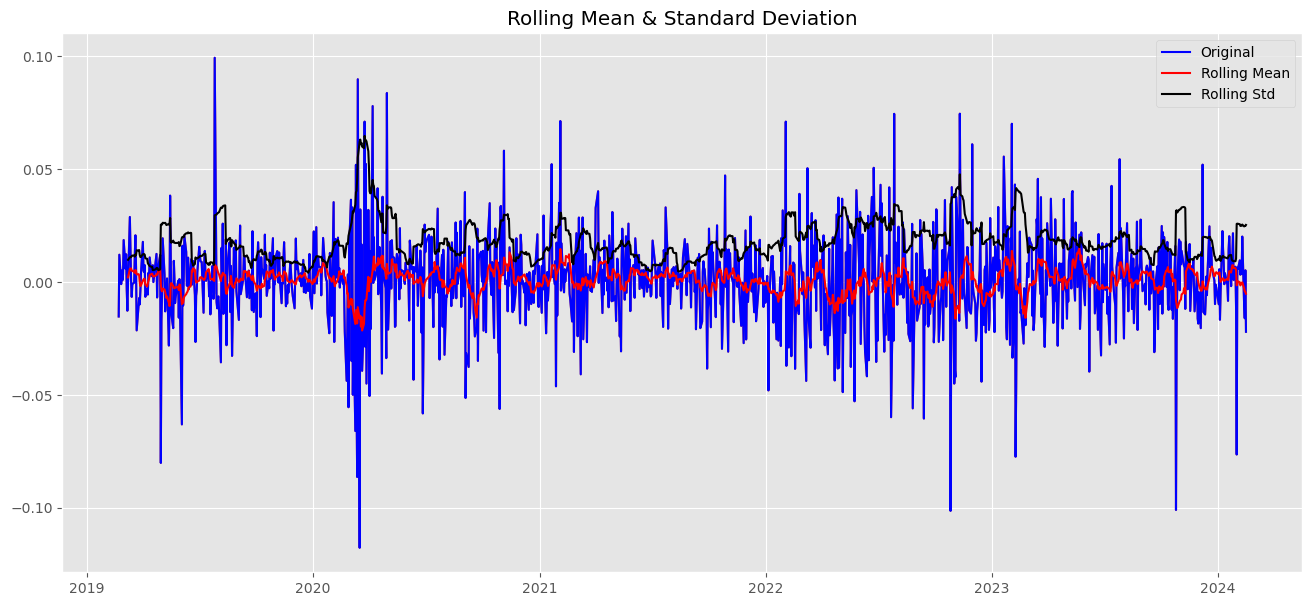

In [30]:
#Differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [31]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

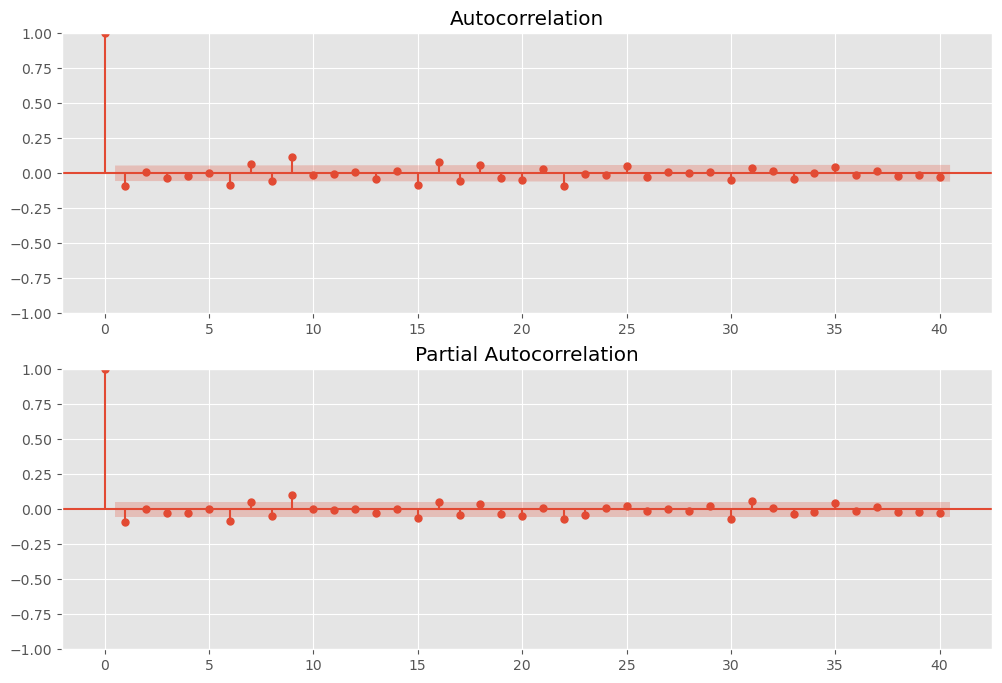

In [32]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
type(ts_log_diff)

pandas.core.series.Series

In [35]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

In [37]:
type(ts_log_diff)

pandas.core.series.Series

In [38]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


<Figure size 1600x800 with 0 Axes>

In [40]:
import statsmodels.api as sm


In [41]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
# model = ARIMA(ts_log_diff, order=(2,1,2))  
model = sm.tsa.arima.ARIMA(ts_log_diff, order=(2,1,2))


C:\Users\EndUser\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1600x800 with 0 Axes>

In [42]:
result = model.fit()

C:\Users\EndUser\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\EndUser\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\EndUser\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
plt.figure(figsize=(16,8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

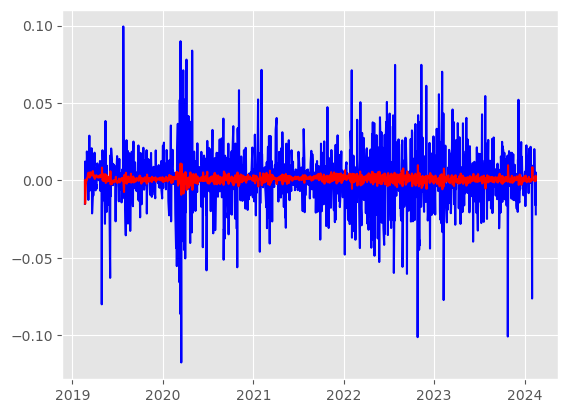

In [46]:
plt.plot(ts_log_diff, color = 'blue')
plt.plot(result.fittedvalues, color='red')

In [48]:
ARIMA_diff_predictions = pd.Series(result.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2019-02-21    0.000000
2019-02-22   -0.015226
2019-02-25   -0.002584
2019-02-26   -0.001352
2019-02-27    0.000509
dtype: float64


In [49]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2019-02-21    0.000000
2019-02-22   -0.015226
2019-02-25   -0.017810
2019-02-26   -0.019162
2019-02-27   -0.018652
dtype: float64


In [50]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2019-02-20    4.019801
2019-02-21    4.019801
2019-02-22    4.004575
2019-02-25    4.001991
2019-02-26    4.000639
dtype: float64

Text(0.5, 1.0, 'RMSE: 28.4565')

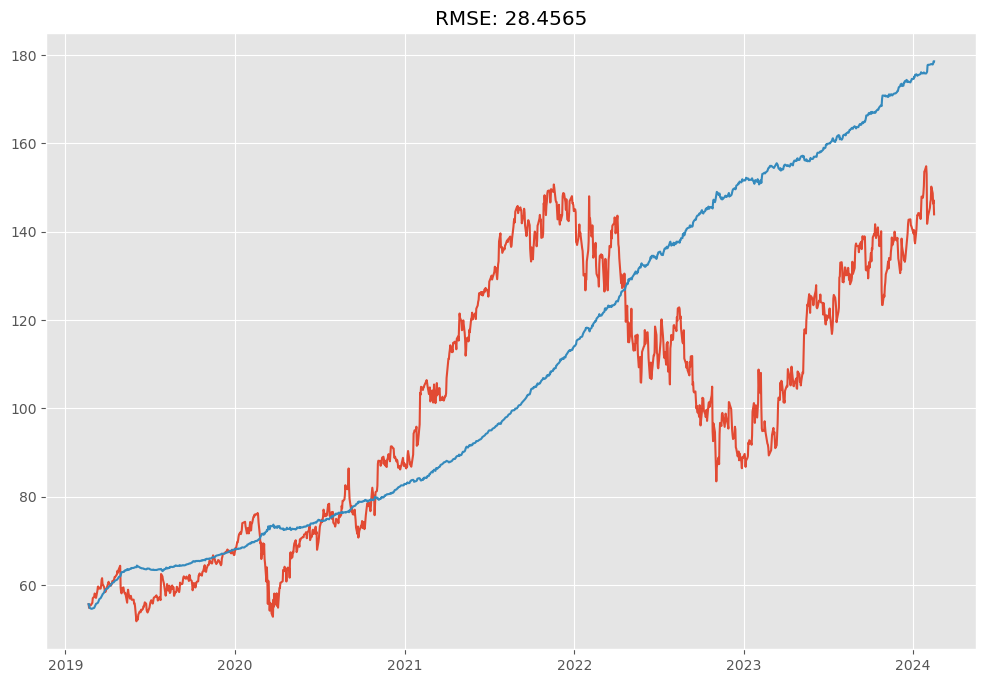

In [51]:

plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(goog)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-goog)**2)/len(goog)))

In [54]:
result.predict(10,20)

Date
2019-03-07    0.004907
2019-03-08    0.004002
2019-03-11    0.002736
2019-03-12    0.001798
2019-03-13    0.003921
2019-03-14    0.005207
2019-03-15    0.005012
2019-03-18    0.004300
2019-03-19    0.003770
2019-03-20    0.003321
2019-03-21    0.003090
Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'MAPE: 20.3727')

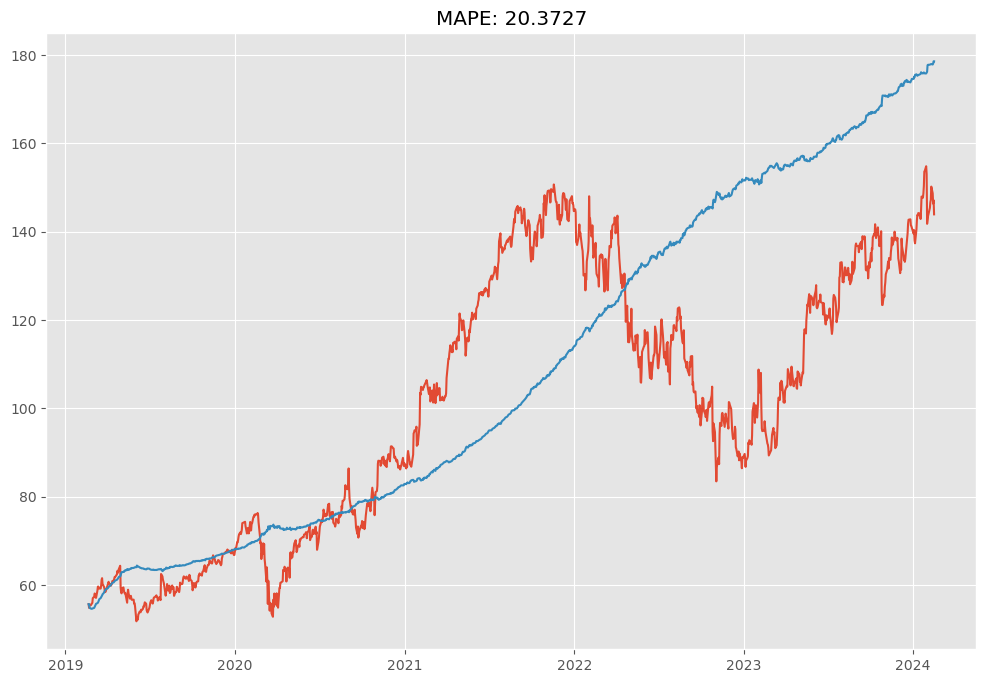

In [55]:
plt.figure(figsize=(12, 8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(goog)
plt.plot(predictions_ARIMA)
mape = np.mean(np.abs((goog - predictions_ARIMA) / goog)) * 100
plt.title('MAPE: %.4f' % mape)